# Temperature Forecast Project using ML

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [6]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [7]:
#loading the data set
df= pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [8]:
df.shape

(7752, 25)

Observation: Dataset contains the 7752 records and 25th columns 

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [ ]:
Observation:
1. dataset contains float and object data types

In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Observation: the data set contains the null values so need to treat

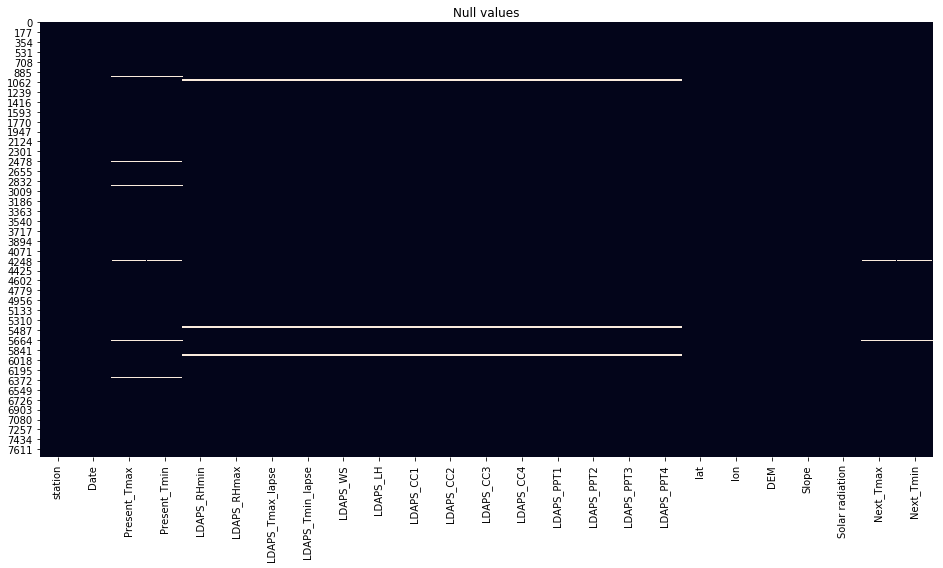

In [12]:
#Heat map to check the null values
plt.figure(figsize=[16,8])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null values')
plt.show()

In [ ]:
Observation: the data set contains the null values so need to treat

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [ ]:
Observation: 
1. Next_Tmax Mean of the temprature is less then the median of temprature 
2. Mean of the temprature and median of temprature is almost same   

In [19]:
#filling the missing rating with Zero values 

median1 =df['station'].median()
df['station'].fillna(median1, inplace=True)

mean1 =df['Present_Tmax'].mean()
df['Present_Tmax'].fillna(mean1, inplace=True)

mean2 =df['Present_Tmin'].mean()
df['Present_Tmin'].fillna(mean2, inplace=True)

mean3 =df['LDAPS_RHmin'].mean()
df['LDAPS_RHmin'].fillna(mean3, inplace=True)

mean4 =df['LDAPS_RHmax'].mean()
df['LDAPS_RHmax'].fillna(mean4, inplace=True)

mean5 =df['LDAPS_Tmax_lapse'].mean()
df['LDAPS_Tmax_lapse'].fillna(mean5, inplace=True)

mean6 =df['LDAPS_Tmin_lapse'].mean()
df['LDAPS_Tmin_lapse'].fillna(mean6, inplace=True)

mean7 =df['LDAPS_WS'].mean()
df['LDAPS_WS'].fillna(mean7, inplace=True)



df['LDAPS_WS'].fillna('0', inplace=True)
df['LDAPS_LH'].fillna('0', inplace=True)
df['LDAPS_PPT2'].fillna('0', inplace=True)
df['LDAPS_PPT3'].fillna('0', inplace=True)
df['LDAPS_PPT4'].fillna('0', inplace=True)
df['lat'].fillna('0', inplace=True)
df['lon'].fillna('0', inplace=True)
df['DEM'].fillna('0', inplace=True)
df['Slope'].fillna('0', inplace=True)
df['Solar radiation'].fillna('0', inplace=True)
df['Next_Tmax'].fillna('0', inplace=True)
df['Next_Tmin'].fillna('0', inplace=True)




NameError: name 'Present_Tmax' is not defined

In [16]:
df.head(100)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [ ]:
df['Occupation'].value_counts(normalize=False)[:15].plot(kind='barh')

In [ ]:
#to check the classification in target variable
df['Attrition'].value_counts()

In [ ]:
#univariate analysis
sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts())
plt.show()

In [ ]:
sns.countplot(df['OverTime'])
print(df['OverTime'].value_counts())
plt.show()

In [ ]:
sns.countplot(df['MaritalStatus'])
print(df['MaritalStatus'].value_counts())
# number of years spent in the same company
no_of_years=df.groupby('YearsAtCompany').count()
plt.bar(no_of_years.index.values, no_of_years['EmployeeNumber'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()plt.show()

In [ ]:
#Selecting the object data types 

objDf = df.select_dtypes(include=['object']).copy()
objDf.head(2)

In [ ]:
#Encoding the categorical vaiables using Label encoder

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

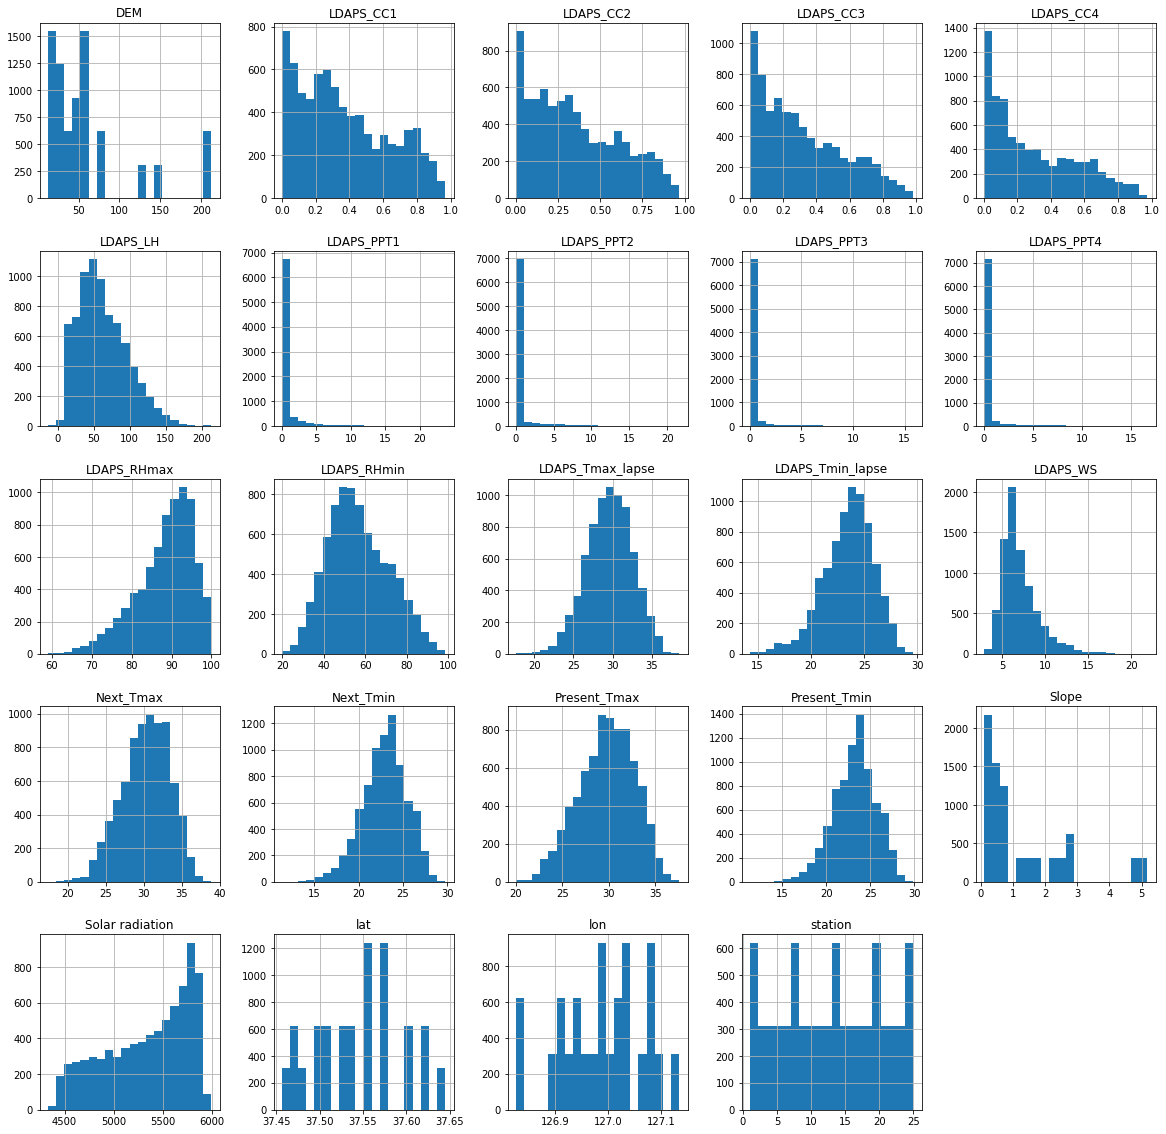

In [5]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

In [ ]:
df['Marital_status'].value_counts(normalize=False)[:15].plot(kind='barh')

In [ ]:
df['Education'].value_counts()

In [ ]:
plt.scatter(df['Income'],df['Education'])

In [ ]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [ ]:
#to display the corealtion with the target variables 
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending = False)


In [ ]:
columns =['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [ ]:
# with the help of box plot checking the outliers in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

In [ ]:
# plot data points
plt.scatter(df["YearsAtCompany"], df["YearsSinceLastPromotion"], color = "b", s = 65)
plt.grid()

In [ ]:
sns.pairplot(df, x_vars=['Age','Race','Sex'], y_vars='Income', size=7, aspect=0.7, kind='reg')

In [ ]:
#Spliting the data into x and y set
x =df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [ ]:
#import library
from collections import Counter
#import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter =Counter(y_smote)
print('after', counter)

In [ ]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_smote,y_smote)   #over sampled data using here
#dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


In [ ]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #Over sampled data

lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)
print("Accuracy_score", accuracy_score(y_test,pred))

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

In [ ]:
#AUC ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('<=50K')
plt.ylabel('>50K')
plt.title('Losgistic Regression')
plt.show()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
rf_pred =rf.predict(x_test)
print('accuracy score', rf_pred)
print(accuracy_score(y_test,rf_pred)) 
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

In [ ]:
## SVM model

In [ ]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
sv_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,sv_pred))
print(confusion_matrix(y_test,sv_pred))
print(classification_report(y_test,sv_pred))

In [ ]:
#Grid Search
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

In [ ]:
#### Saving the Model----
Random Forest and Decsion Tree classification model getting the highest accuarcy so we are saving the Decision Tree model

In [ ]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(dt, 'dt.pkl')
  
# Load the model from the file
dt_joblib = joblib.load('dt.pkl') 
  
# Use the loaded model to make predictions
#dt_joblib.predict(x_test)